Problem 1

a)


Elapsed (wall clock) times:

SJN High Util:

Run 1: 0:45.24s

Run 2: 0:45.25s

Run 3: 0:42.71s

Run 4: 0:42.71s

Run 5: 0:43.66s

Run 6: 0:43.66s

Run 7: 0:43.27s

Run 8: 0:42.44s

Run 9: 0:45.71s

Run 10: 0:46.09s

Average: 48.535s

FIFO High Util:

Run 1: 0:44.28s

Run 2: 0:45.46s

Run 3: 0:42.53s

Run 4: 0:42.24s

Run 5: 0:42.20s

Run 6: 0:46.43s

Run 7: 0:46.43s

Run 8: 0:44.25s

Run 9: 0:45.79s

Run 10: 0:46.81

Average: 44.642

SJN Low Util:

Run 1: 2:42.85s

Run 2: 2:40.60s

Run 3: 2:38.98s

Run 4: 2:40.69s

Run 5: 2:42.14s

Run 6: 2:41.17s

Run 7: 2:41.39s

Run 8: 2:41.46s

Run 9: 2:39.18s

Run 10: 2:38.85s

Average: 2:40.73s

FIFO Low Util:

Run 1: 2:38.66s

Run 2: 2:38.95s

Run 3: 2:39.50s

Run 4: 2:40.95s

Run 5: 2:40.17s

Run 6: 2:38.42s

Run 7: 2:42.18s

Run 8: 2:38.35s

Run 9: 2:39.05s

Run 10: 2:38.59s

Average: 2:39.48s










For high utilization, the average runtimes for SJN and FIFO, were 48.535s and 44.642s, respectively. This makes sense, because SJN requires overhead resources for processing the removal from the queue, which explains the roughly 4 second difference.

For low utilization, FIFO is slightly faster once again, but only by a small amount. This makes sense, because the queue will be shorter so processing it should take less time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def output_to_df(output):
  column_names = [
      "WorkerID",
      "RequestID",
      "ClientRequestTimestamp",
      "ClientRequestLength",
      "ReceiptTimestamp",
      "StartTimestamp",
      "CompletionTimestamp",
  ]

  df = pd.read_csv(output, on_bad_lines='skip', names=column_names)

  return df

def extract_data(df):

  total_busy_time = 0
  for i in range(len(df["ClientRequestLength"])):
    request_busy_time = (df["CompletionTimestamp"].iloc[i] - df["StartTimestamp"].iloc[i])
    if request_busy_time > 0:
      total_busy_time += request_busy_time


  total_time = df["CompletionTimestamp"].iloc[-1] - df["ClientRequestTimestamp"].iloc[0]

  utilization = total_busy_time / total_time

  queueingTime = df["StartTimestamp"] - df["ClientRequestTimestamp"]
  serviceTime = df["CompletionTimestamp"] - df["StartTimestamp"]
  df["ResponseTime"] = queueingTime + serviceTime

  avg_response_time = df["ResponseTime"].mean()

  return utilization, avg_response_time

In [ ]:
df = output_to_df("fifo-output0.txt")
extract_data(df)
df.head()

,WorkerID,RequestID,ClientRequestTimestamp,ClientRequestLength,ReceiptTimestamp,StartTimestamp,CompletionTimestamp,ResponseTime
0,0,0,1.917143e+06,0.025075,1.917143e+06,1.917143e+06,1.917143e+06,0.025184
1,1,1,1.917143e+06,0.080083,1.917143e+06,1.917143e+06,1.917143e+06,0.080207
2,0,2,1.917143e+06,0.011004,1.917143e+06,1.917143e+06,1.917143e+06,0.011068
3,1,3,1.917143e+06,0.073100,1.917143e+06,1.917143e+06,1.917143e+06,0.073246
4,0,4,1.917143e+06,0.040368,1.917143e+06,1.917143e+06,1.917143e+06,0.063011


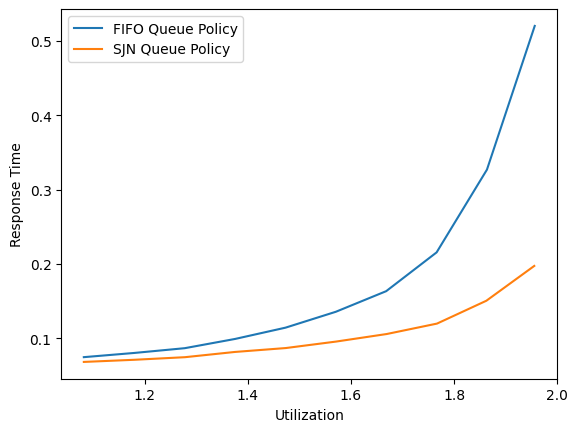

In [ ]:
num_runs = 10

rt_fifo = np.zeros(num_runs)
rt_sjn = np.zeros(num_runs)
util_fifo = np.zeros(num_runs)
util_sjn = np.zeros(num_runs)

for i in range(num_runs):

  # convert .txt to dataframes
  df_fifo = output_to_df(f"fifo-output{i}.txt")
  df_sjn = output_to_df(f"sjn-output{i}.txt")

  # get data from dataframes
  fifo_util, fifo_rt = extract_data(df_fifo)
  sjn_util, sjn_rt = extract_data(df_sjn)

  # put data into arrays
  rt_fifo[i] = fifo_rt
  rt_sjn[i] = sjn_rt
  util_fifo[i] = fifo_util
  util_sjn[i] = sjn_util

fig, ax = plt.subplots()

ax.plot(util_fifo, rt_fifo, label='FIFO Queue Policy')
ax.plot(util_sjn, rt_sjn, label='SJN Queue Policy')
ax.set_xlabel('Utilization')
ax.set_ylabel('Response Time')

plt.legend()

plt.show()



At the highest utilization, FIFO's average response time is 0.5 seconds while SJN's is 0.2. At this utilization, SJN is 60% faster than a FIFO queue.

SJN 99th percentile: 2.30028643002035
FIFO 99th percentile: 1.3215886398870498


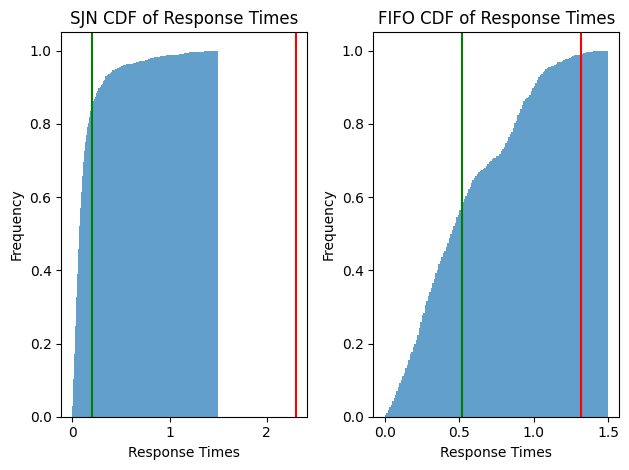

In [ ]:
df_fifo = output_to_df("fifo-output9.txt")
df_sjn = output_to_df("sjn-output9.txt")

extract_data(df_fifo)
extract_data(df_sjn)

response_times_fifo = df_fifo["ResponseTime"]
response_times_sjn = df_sjn["ResponseTime"]

response_times_fifo = np.sort(response_times_fifo)
response_times_sjn = np.sort(response_times_sjn)

fifo_percentile = np.percentile(response_times_fifo, 99)
sjn_percentile = np.percentile(response_times_sjn, 99)
print("SJN 99th percentile:", sjn_percentile)
print("FIFO 99th percentile:", fifo_percentile)
fifo_avg = np.mean(response_times_fifo)
sjn_avg = np.mean(response_times_sjn)

max = np.max(response_times_fifo)

bin_width = 0.01

bins = np.arange(0, 1.5 + bin_width, bin_width)

plt.subplot(1, 2, 1)
plt.hist(response_times_sjn, bins=bins, density=True, cumulative=True, alpha=0.7)
plt.axvline(x=sjn_percentile, color='red')
plt.axvline(x=sjn_avg, color='green')
plt.title('SJN CDF of Response Times')
plt.xlabel('Response Times')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(response_times_fifo, bins=bins, density=True, cumulative=True, alpha=0.7)
plt.axvline(x=fifo_percentile, color='red')
plt.axvline(x=fifo_avg, color='green')
plt.title('FIFO CDF of Response Times')
plt.xlabel('Response Times')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Based on the CDFs, SJN provideds greater predictability because almost all of the response times are around the average, whereas for the FIFO the requests are spread farther out. For some reason the 99th percentile for SJN is weirdly high, which I think may be a bug, because the CDF isn't even continuing to that point.